Analysis of low birth weight.
                      -Vijay_Yerramsetti(22nd November 2021)


In [292]:
#importing the libraries
import pandas as pd# data science essentials
import matplotlib.pyplot as plt# data visualization
import seaborn as sns# enhanced data visualization
import numpy as np# regression modeling
import statsmodels.formula.api as smf # train/test split
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression

file = "/Users/Apple/Desktop/birthweight_low.xlsx"

birth_weight = pd.read_excel(io = file)

birth_weight.head(n=15)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [293]:
#checking the missing values
birth_weight.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [294]:
#dropping down the omaps column
birth_weight.drop('omaps',1,inplace=True)

birth_weight.head()

/var/folders/wl/9fk5z97j1wb10lx2c5w4xv000000gn/T/ipykernel_9197/3308703864.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  birth_weight.drop('omaps',1,inplace=True)


,mage,meduc,monpre,npvis,fage,feduc,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,9,17,13,0,1,0,0,1,0,0,1956


In [295]:
#dropping down the omaps column
birth_weight.drop('fmaps',1,inplace=True)

birth_weight.head()

/var/folders/wl/9fk5z97j1wb10lx2c5w4xv000000gn/T/ipykernel_9197/3601034039.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  birth_weight.drop('fmaps',1,inplace=True)


,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,17,13,0,1,0,0,1,0,0,1956


In [296]:
#studying the data before working with missing values
birth_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   cigs    196 non-null    int64  
 7   drink   196 non-null    int64  
 8   male    196 non-null    int64  
 9   mwhte   196 non-null    int64  
 10  mblck   196 non-null    int64  
 11  moth    196 non-null    int64  
 12  fwhte   196 non-null    int64  
 13  fblck   196 non-null    int64  
 14  foth    196 non-null    int64  
 15  bwght   196 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 24.6 KB


In [297]:
#Replacing the missing values with the mean
for col in birth_weight:
    if birth_weight[col].isnull().sum() > 0:
        mean = birth_weight[col].mean()
        birth_weight[col].fillna(value=mean,
                      inplace = True)

In [298]:
#converting them from float to integers
birth_weight['meduc'] = birth_weight['meduc'].apply(np.int64)
birth_weight['npvis'] = birth_weight['npvis'].apply(np.int64)
birth_weight['feduc'] = birth_weight['feduc'].apply(np.int64)

In [299]:
#checking the missing values after repacing
birth_weight.isnull().sum()

mage      0
meduc     0
monpre    0
npvis     0
fage      0
feduc     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [300]:
#checking the date
birth_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   mage    196 non-null    int64
 1   meduc   196 non-null    int64
 2   monpre  196 non-null    int64
 3   npvis   196 non-null    int64
 4   fage    196 non-null    int64
 5   feduc   196 non-null    int64
 6   cigs    196 non-null    int64
 7   drink   196 non-null    int64
 8   male    196 non-null    int64
 9   mwhte   196 non-null    int64
 10  mblck   196 non-null    int64
 11  moth    196 non-null    int64
 12  fwhte   196 non-null    int64
 13  fblck   196 non-null    int64
 14  foth    196 non-null    int64
 15  bwght   196 non-null    int64
dtypes: int64(16)
memory usage: 24.6 KB


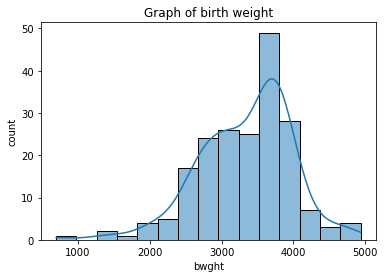

In [301]:
#plotting the histogram to check the skewness
sns.histplot(data=birth_weight,
             x ='bwght',
             kde = True)

plt.title(label = 'Graph of birth weight')
plt.xlabel(xlabel = 'bwght')
plt.ylabel(ylabel = 'count')

plt.show()

In [302]:
continuous_data = ['mage',
'meduc',
'monpre',
'npvis',
'fage',
'feduc',
'cigs',
'drink',
'male',
'mwhte',
'mblck',
'moth',
'fwhte',
'fblck',
'foth',
'bwght']


# developing a correlation matrix based on continuous features
birth_weight_corr = birth_weight[continuous_data].corr(method = 'pearson')
# filtering the results to only show correlations 
birth_weight_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght     1.00
feduc     0.13
mblck     0.13
fblck     0.12
male      0.11
meduc     0.10
npvis     0.06
moth     -0.02
fwhte    -0.04
monpre   -0.05
foth     -0.08
mwhte    -0.11
fage     -0.40
mage     -0.46
cigs     -0.57
drink    -0.74
Name: bwght, dtype: float64

In [303]:
#Correlation Analysis
birth_weight.corr(method ='pearson')

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
mage,1.000000,-0.101121,0.164198,-0.051951,0.583608,-0.091804,0.167293,0.336698,-0.049694,0.007738,-0.024107,0.017395,-0.082203,0.035503,0.048140,-0.463811
meduc,-0.101121,1.000000,-0.231833,0.145706,-0.073541,0.619280,0.101027,-0.077802,-0.040166,-0.279532,-0.192379,0.457279,-0.179154,-0.233107,0.422997,0.102120
monpre,0.164198,-0.231833,1.000000,-0.341035,0.042767,-0.313534,-0.058436,0.015553,-0.075269,0.075486,0.134837,-0.208120,0.037708,0.032603,-0.072167,-0.051827
npvis,-0.051951,0.145706,-0.341035,1.000000,-0.060761,0.034723,0.034987,-0.066629,0.000198,0.042509,-0.092910,0.055203,0.037440,-0.067869,0.031038,0.060237
fage,0.583608,-0.073541,0.042767,-0.060761,1.000000,-0.012234,0.174795,0.291435,-0.085186,0.035367,-0.057187,0.025391,-0.027247,-0.032996,0.061815,-0.395985
feduc,-0.091804,0.619280,-0.313534,0.034723,-0.012234,1.000000,0.051064,-0.117800,0.070787,-0.405596,-0.138998,0.520407,-0.350464,-0.144382,0.508222,0.131294
cigs,0.167293,0.101027,-0.058436,0.034987,0.174795,0.051064,1.000000,0.355779,-0.115098,0.033570,-0.197749,0.170593,-0.007297,-0.193035,0.205261,-0.572385
drink,0.336698,-0.077802,0.015553,-0.066629,0.291435,-0.117800,0.355779,1.000000,-0.092433,0.164619,-0.111658,-0.039600,0.071382,-0.095792,0.024750,-0.743125
male,-0.049694,-0.040166,-0.075269,0.000198,-0.085186,0.070787,-0.115098,-0.092433,1.000000,-0.097089,0.119737,-0.031665,-0.031665,0.109894,-0.080029,0.114855
mwhte,0.007738,-0.279532,0.075486,0.042509,0.035367,-0.405596,0.033570,0.164619,-0.097089,1.000000,-0.479300,-0.443731,0.835258,-0.438745,-0.409230,-0.114388


In [304]:
birth_weight['age'] = birth_weight['mage'] + birth_weight['fage']

In [305]:
#feature engineering
dropping_columns = [ 'monpre', 'npvis', 'male', 'feduc', 'fage', 'mage' ]
birth_weight.drop(dropping_columns, axis = 1, inplace = True)

In [306]:
# Separateing the inputs
y = birth_weight.bwght
x = birth_weight.drop('bwght', axis=1)

In [307]:
# preparing explanatory variable data
birth_weight_data  = birth_weight.drop(['bwght'],axis = 1)


# preparing response variable data
birth_weight_target = birth_weight.loc[ : , 'bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            x,
            y,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (147, 10)
y-side: 147


Testing Data
------------
X-side: (49, 10)
y-side: 49



In [308]:
#checking the training data
x_train.head().round()

,meduc,cigs,drink,mwhte,mblck,moth,fwhte,fblck,foth,age
42,16,11,7,0,0,1,0,0,1,112
9,12,13,6,0,1,0,0,1,0,119
80,16,15,4,0,0,1,0,0,1,83
82,12,7,6,0,1,0,0,1,0,67
45,12,10,4,1,0,0,1,0,0,113


In [309]:
# importing an additional package
import statsmodels.api as smf # predictive modeling w

# Step 1: INSTANTIATE a model object

lm_best = smf.OLS(y_train, x_train).fit()

# Step 2: FIT the data into the model object
#results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(lm_best.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     44.47
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.43e-34
Time:                        01:34:42   Log-Likelihood:                -1071.0
No. Observations:                 147   AIC:                             2160.
Df Residuals:                     138   BIC:                             2187.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
meduc         37.8655     16.784      2.256      0.0

LASSO REGRESSION ANALYSIS

In [310]:
import sklearn.linear_model # linear models
# Model object instantiating
lasso_model = sklearn.linear_model.Lasso(alpha     = 1.0, 
                                         normalize = True)

# inputting the training data
lasso_fit = lasso_model.fit(x_train, y_train)

# prediction
lasso_pred = lasso_fit.predict(x_test)

# printing the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))

# Data scoring
lasso_train_score = lasso_model.score(x_train, y_train).round(4) 
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)   

# gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7176
Lasso Testing Score  : 0.6676
Lasso Train-Test Gap : 0.05


LINEAR REGRESSION ANALYSIS

In [272]:
# Model object instantiating
lr = LinearRegression()

# inputting the training data
lr_fit = lr.fit(x_train, y_train)

# prediction
lr_pred = lr_fit.predict(x_test)

# printing the results
print('OLS Training Score :', lr.score(x_train, y_train).round(4))
print('OLS Testing Score  :', lr.score(x_test, y_test).round(4))

# Data scoring
lr_train_score = lr.score(x_train, y_train).round(4)
lr_test_score  = lr.score(x_test, y_test).round(4)

# gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7205
OLS Testing Score  : 0.6491
OLS Train-Test Gap : 0.0714


ADR regression model

In [273]:
# Model object instantiating
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)

# prediction
ard_fit = ard_model.fit(x_train, y_train)

# prediction
ard_pred = ard_fit.predict(x_test)

# printing the results
print('Training Score:', ard_model.score(x_train, y_train).round(4))
print('Testing Score :',  ard_model.score(x_test, y_test).round(4))

#Data scoring
ard_train_score = ard_model.score(x_train, y_train).round(4)
ard_test_score  = ard_model.score(x_test, y_test).round(4)

# gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7158
Testing Score : 0.6755
ARD Train-Test Gap : 0.0403


In [274]:
# comparing results

print(f"""
Model      Train Score     Test Score      Train-Test Gap
-----      -----------     ----------      --------------
OLS        {lr_train_score}           {lr_test_score}            {lr_test_gap}
Lasso      {lasso_train_score}           {lasso_test_score}            {lasso_test_gap}
ARD        {ard_train_score}           {ard_test_score}           {ard_test_gap}
 """) 

# Model results creation
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    }





Model      Train Score     Test Score      Train-Test Gap
-----      -----------     ----------      --------------
OLS        0.7205           0.6491            0.0714
Lasso      0.7176           0.6676            0.05
ARD        0.7158           0.6755           0.0403
 


ARD is the best score based upon the analysis and best fitting model